In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"  # Set Plotly renderer for Google Colab

# Statistical tools
from scipy import stats

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Auto-reporting
!pip install ydata-profiling --quiet
from ydata_profiling import ProfileReport


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/content/amazon.csv")

# Display the first 5 rows
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
# Check the number of rows and columns
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1465, 16)


In [4]:
# List all column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [5]:
print("\nData types:")
print(df.dtypes)


Data types:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [7]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B083342NKJ  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999          

In [8]:
# Drop rows with missing values (you can customize this step later)
df_clean = df.dropna()

In [9]:
# Remove duplicates if any
df_clean = df_clean.drop_duplicates()

In [10]:
# Reset index after cleaning
df_clean.reset_index(drop=True, inplace=True)

In [11]:
# Confirm changes
print("Cleaned dataset shape:", df_clean.shape)
print("\nRemaining missing values:", df_clean.isnull().sum().sum())

Cleaned dataset shape: (1463, 16)

Remaining missing values: 0


In [12]:
# Display original column names
print("Original column names:\n", df_clean.columns.tolist())

# Example: rename columns to lowercase and replace spaces with underscores
df_clean.columns = df_clean.columns.str.lower().str.strip().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)

# Show cleaned column names
print("\nCleaned column names:\n", df_clean.columns.tolist())


Original column names:
 ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']

Cleaned column names:
 ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [14]:
# Remove currency symbols, percentage signs and convert to float
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹','').str.replace(',',''), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹','').str.replace(',',''), errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%','').str.replace('-',''), errors='coerce')

# Rating ve rating count zaten numeric görünüyor ama emin olmak için yine dönüştürelim
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [15]:
# Display summary statistics for numerical features
df.describe(include='number')


,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,326.000000
mean,3125.310874,5444.990635,47.691468,4.096585,348.217791
std,6944.304394,10874.826864,21.635905,0.291674,268.041590
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,119.000000
50%,799.000000,1650.000000,50.000000,4.100000,293.000000
75%,1999.000000,4295.000000,63.000000,4.300000,544.000000
max,77990.000000,139900.000000,94.000000,5.000000,992.000000


In [17]:
import pandas as pd
import plotly.express as px

# Ensure text columns are string, then calculate word count
df_clean['description_length'] = df_clean['about_product'].astype(str).apply(lambda x: len(x.split()))
df_clean['review_length'] = df_clean['review_content'].astype(str).apply(lambda x: len(x.split()))

# Drop rows with missing values in these columns
df_lengths = df_clean.dropna(subset=['description_length', 'review_length'])

# Interactive scatter plot
fig = px.scatter(df_lengths,
                 x='description_length',
                 y='review_length',
                 color='rating',
                 hover_data=['product_name', 'review_title'],
                 title='Review Length vs Product Description Length',
                 labels={
                     'description_length': 'Product Description Length (words)',
                     'review_length': 'Review Content Length (words)'
                 })

fig.show()


In [18]:

# Clean discount column if not already done
df_clean['discount_percentage'] = df_clean['discount_percentage'].astype(str).str.replace('%', '').str.strip()
df_clean['discount_percentage'] = pd.to_numeric(df_clean['discount_percentage'], errors='coerce')

# Group by category
df_discount_summary = df_clean.groupby('category').agg({
    'product_id': 'count',
    'discount_percentage': 'mean'
}).reset_index()

df_discount_summary.rename(columns={
    'product_id': 'product_count',
    'discount_percentage': 'avg_discount_perc'
}, inplace=True)

# Plot treemap
fig = px.treemap(df_discount_summary,
                 path=['category'],
                 values='product_count',
                 color='avg_discount_perc',
                 color_continuous_scale='RdBu',
                 title='Treemap of Product Count and Avg Discount by Category')

fig.show()


In [34]:
import plotly.express as px


df_price_rating = df_clean[['discounted_price', 'rating']].dropna()

# Scatter plot
fig = px.scatter(df_price_rating,
                 x='discounted_price',
                 y='rating',
                 title='Price vs Rating Scatter Plot',
                 labels={'discounted_price': 'Discounted Price (INR)', 'rating': 'Rating'},
                 opacity=0.6)

fig.update_layout(height=600, width=800)
fig.show()


In [24]:
# Örnek: '₹1,499' → 1499.0
df_clean['discounted_price'] = (
    df_clean['discounted_price']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)


In [25]:
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')


/tmp/ipython-input-871835180.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



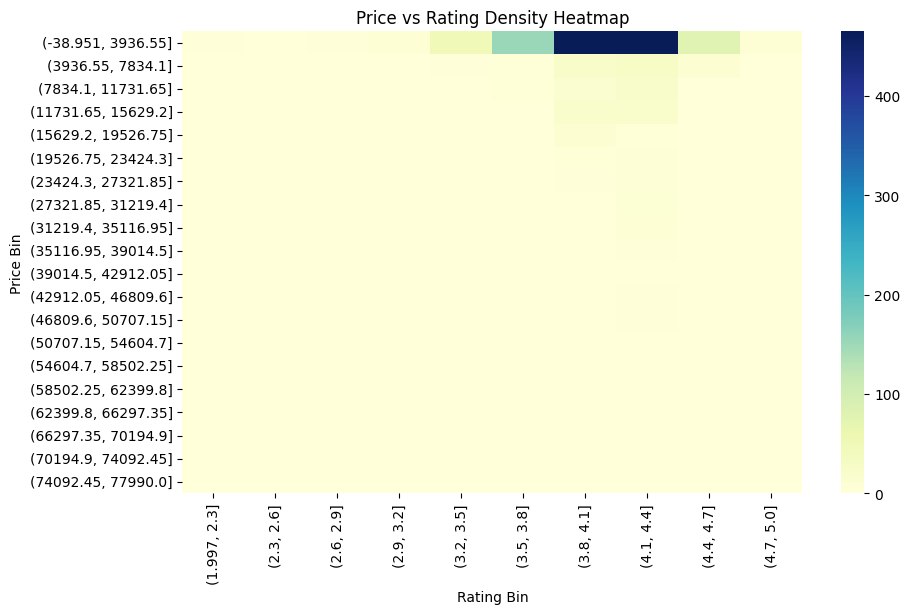

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_heat = df_clean[['discounted_price', 'rating']].dropna().copy()
df_heat['price_bin'] = pd.cut(df_heat['discounted_price'], bins=20)
df_heat['rating_bin'] = pd.cut(df_heat['rating'], bins=10)

heat_data = df_heat.groupby(['price_bin', 'rating_bin']).size().unstack(fill_value=0)

sns.heatmap(heat_data, cmap="YlGnBu")
plt.title("Price vs Rating Density Heatmap")
plt.xlabel("Rating Bin")
plt.ylabel("Price Bin")
plt.show()


In [33]:

df_clean['discount_percentage'] = (
    df_clean['discount_percentage']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .astype(float)
)

df_clean['rating_count'] = pd.to_numeric(df_clean['rating_count'], errors='coerce')


In [29]:
import plotly.express as px

fig = px.scatter(
    df_clean,
    x='discount_percentage',
    y='rating_count',
    trendline='ols',  # Ordinary Least Squares regression line
    title='Discount % vs Rating Count (Sales Success Proxy)',
    labels={'discount_percentage': 'Discount (%)', 'rating_count': 'Rating Count'},
    hover_data=['product_name', 'category']
)

fig.show()


In [32]:

top10_products = (
    df_clean[['product_name', 'rating', 'discounted_price', 'discount_percentage', 'rating_count']]
    .dropna()
    .sort_values(by='rating_count', ascending=False)
    .head(10)
)

top10_products['short_name'] = top10_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
metrics_scaled = scaler.fit_transform(top10_products[['rating', 'discounted_price', 'discount_percentage']])
metrics_df = pd.DataFrame(metrics_scaled, columns=['Rating', 'Price', 'Discount'])


metrics_df['Product'] = top10_products['short_name']


In [35]:
import plotly.graph_objects as go

fig = go.Figure()


for i in range(len(metrics_df)):
    fig.add_trace(go.Scatterpolar(
        r=metrics_df.iloc[i][['Rating', 'Price', 'Discount']].values,
        theta=['Rating', 'Price', 'Discount'],
        fill='toself',
        name=metrics_df.iloc[i]['Product']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Top 10 Commented Products – Radar Comparison",
    showlegend=True
)

fig.show()


In [37]:

filtered_df = df_clean[['product_name', 'rating', 'rating_count']].dropna()


hidden_gems = filtered_df[(filtered_df['rating'] >= 4.5) & (filtered_df['rating_count'] < 20)].sort_values(
    by='rating', ascending=False
)


hidden_gems = hidden_gems.head(15)


/tmp/ipython-input-576816323.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-576816323.py:10: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



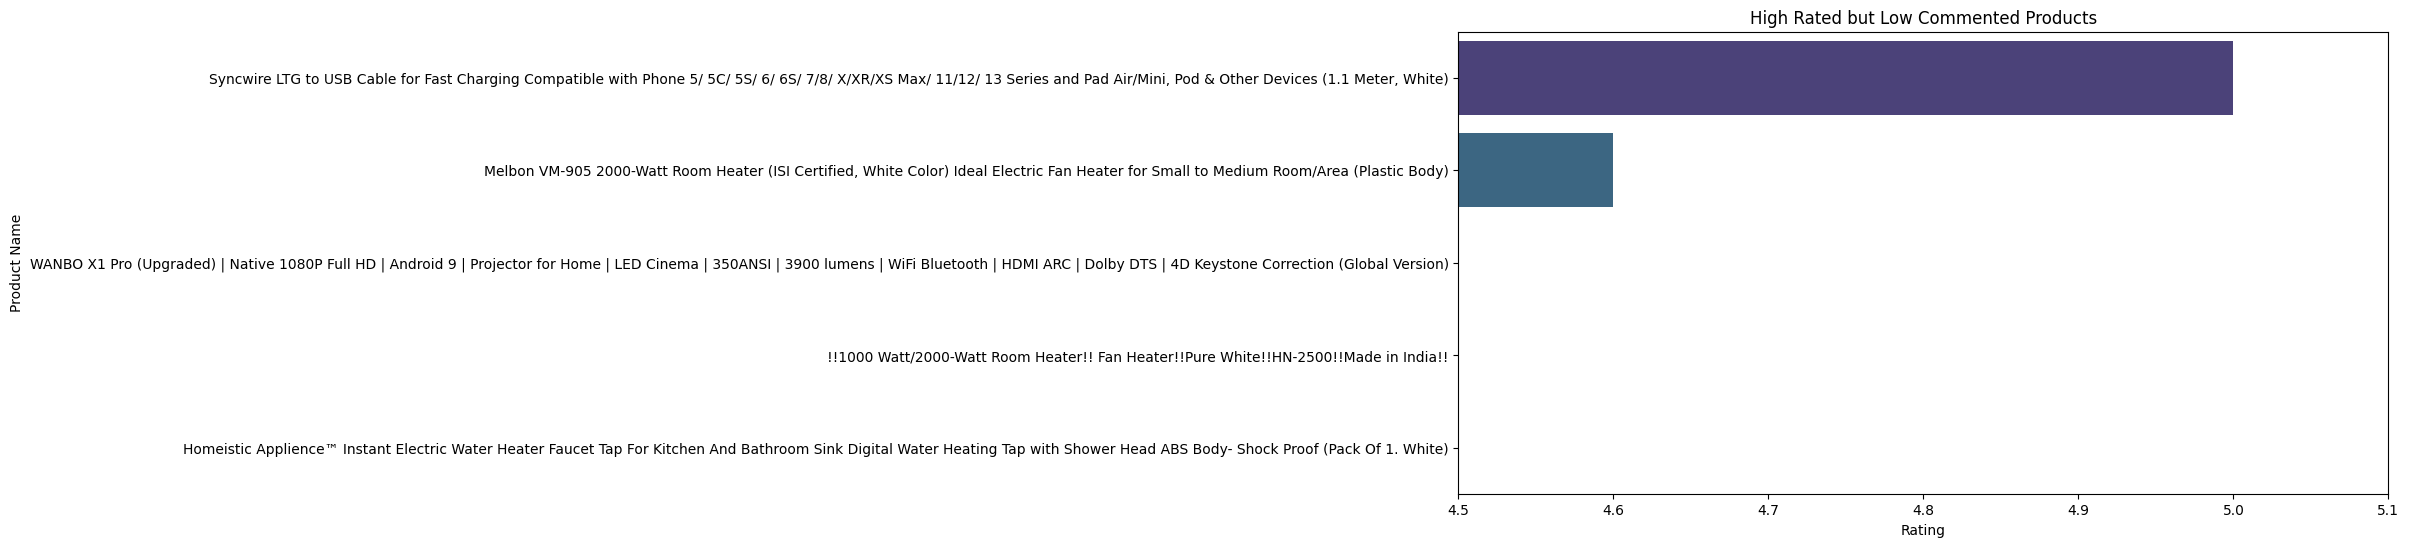

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=hidden_gems, x='rating', y='product_name', palette='viridis')
plt.title('High Rated but Low Commented Products')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.xlim(4.5, 5.1)
plt.tight_layout()
plt.show()


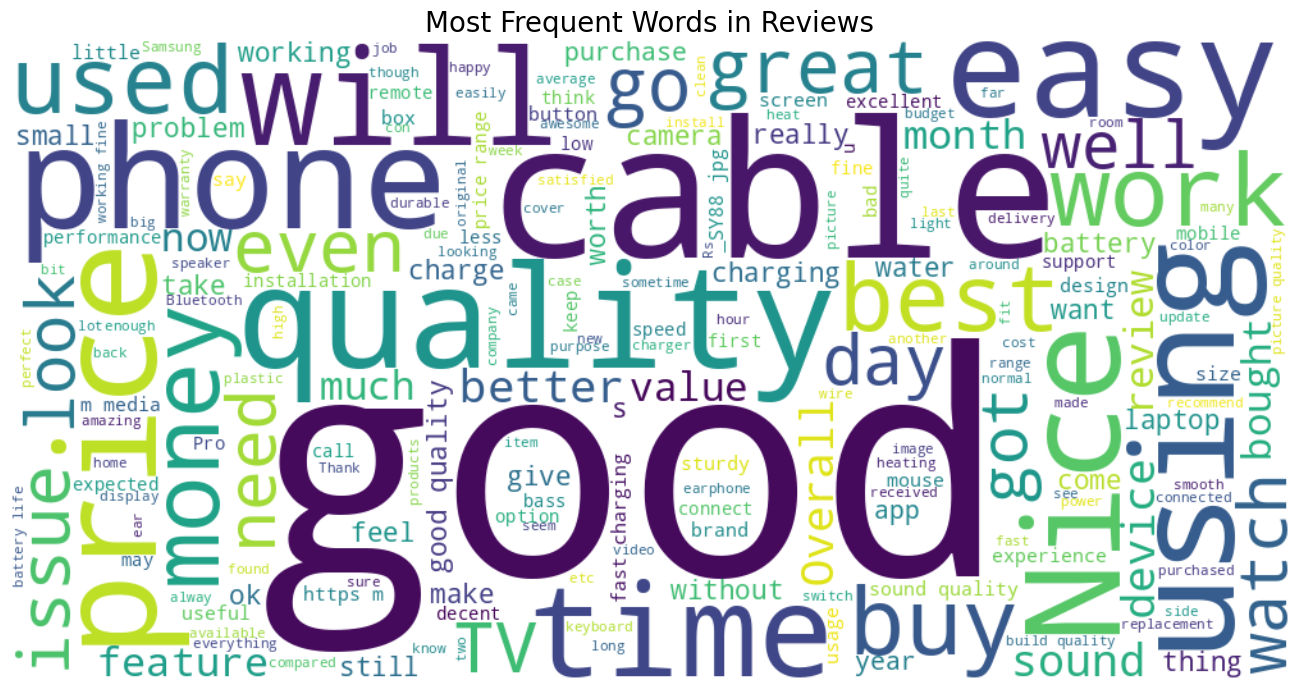

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


text_data = df_clean['review_content'].dropna().astype(str)

all_text = " ".join(text_data)


custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['product', 'use', 'one', 'also', 'get', 'amazon'])

wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=custom_stopwords, colormap='viridis').generate(all_text)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews', fontsize=20)
plt.tight_layout()
plt.show()


In [40]:
!pip install textblob


In [43]:
from textblob import TextBlob


df_sentiment = df_clean[['review_content']].dropna().copy()

df_sentiment['polarity'] = df_sentiment['review_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_sentiment['sentiment'] = df_sentiment['polarity'].apply(get_sentiment)


/tmp/ipython-input-2086076500.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




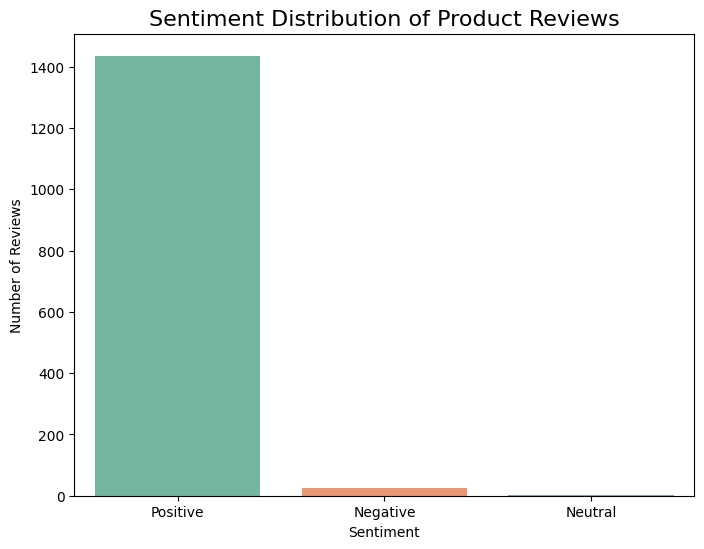

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df_sentiment, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution of Product Reviews", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [45]:

df_sentiment_full = pd.concat([df_sentiment, df_clean[['discounted_price', 'category']].reset_index(drop=True)], axis=1)


df_negative = df_sentiment_full[df_sentiment_full['sentiment'] == 'Negative'].copy()


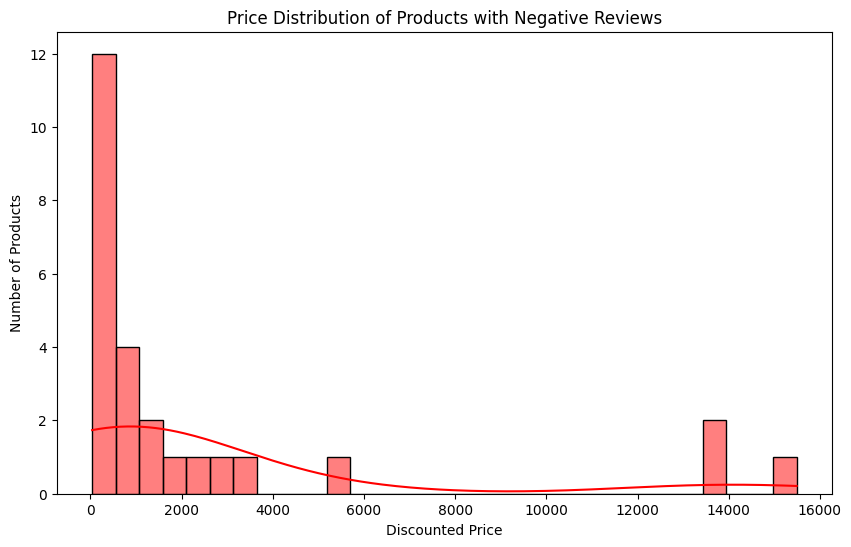

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_negative, x='discounted_price', bins=30, color='red', kde=True)
plt.title('Price Distribution of Products with Negative Reviews')
plt.xlabel('Discounted Price')
plt.ylabel('Number of Products')
plt.show()


/tmp/ipython-input-2725330376.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




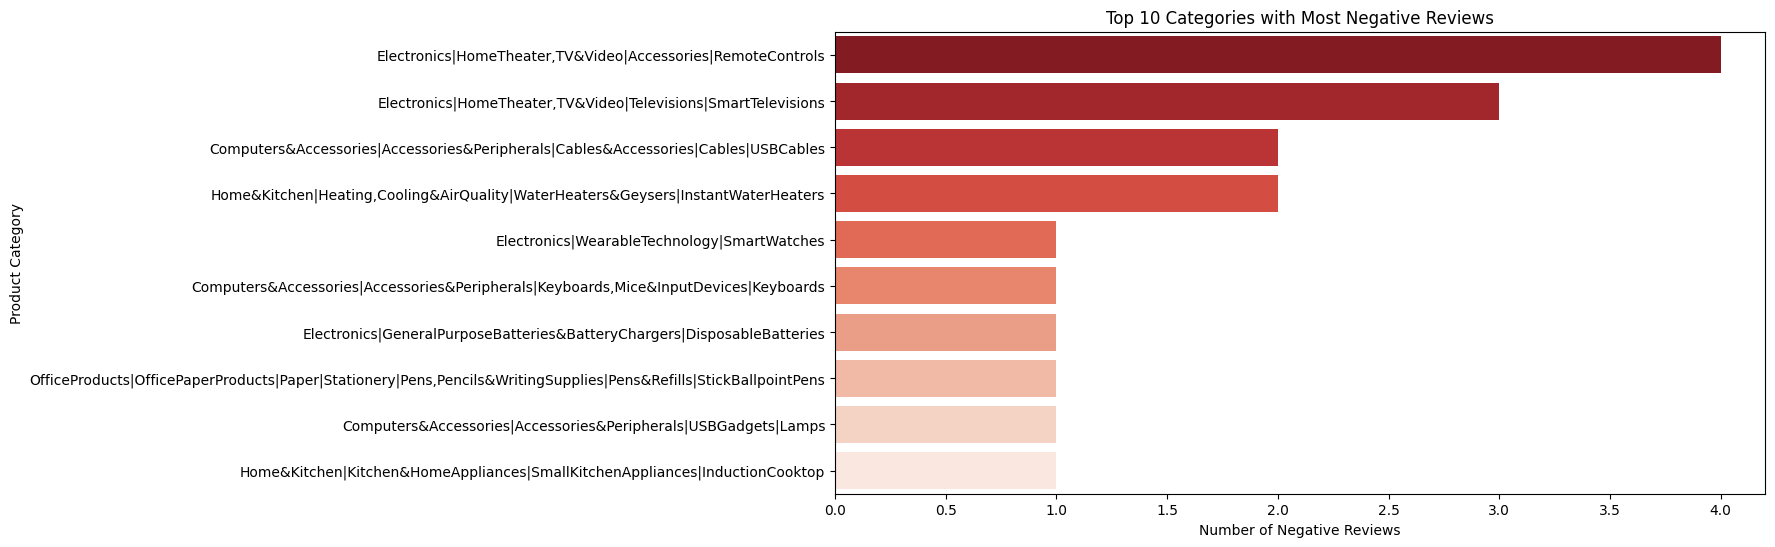

In [47]:
plt.figure(figsize=(12, 6))
top_categories = df_negative['category'].value_counts().nlargest(10).index
sns.countplot(data=df_negative[df_negative['category'].isin(top_categories)],
              y='category', order=top_categories, palette='Reds_r')
plt.title('Top 10 Categories with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Product Category')
plt.show()


In [48]:
# Select only relevant columns and drop missing values
df_scatter = df_clean[['rating', 'review_content']].dropna().copy()

# Calculate review length (in number of words)
df_scatter['review_length'] = df_scatter['review_content'].apply(lambda x: len(str(x).split()))


In [49]:
import plotly.express as px

# Scatter plot with color-coded ratings
fig = px.scatter(
    df_scatter,
    x='review_length',
    y='rating',
    opacity=0.6,
    color='rating',
    color_continuous_scale='RdYlGn',
    title='Review Length vs Rating'
)

# Customize axes and layout
fig.update_layout(
    xaxis_title="Review Length (Word Count)",
    yaxis_title="Product Rating",
    height=600
)

fig.show()


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Drop NaN and limit to top 1000 reviews for speed (optional)
review_corpus = df_clean['review_content'].dropna().astype(str).sample(n=1000, random_state=42)

# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(review_corpus)

# Step 2: NMF Topic Modeling
n_topics = 5
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf)

# Step 3: Display Topics
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"\n🧠 Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))



🧠 Topic 1:
product easy use quality water nice price money value working

🧠 Topic 2:
cable charging fast charger original usb durable quality product charge

🧠 Topic 3:
images jpg _sy88 https com media amazon webp_402378 product t1

🧠 Topic 4:
tv remote picture sound quality installation price service original working

🧠 Topic 5:
watch phone camera battery screen features life price display calling


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/tmp/ipython-input-2932603131.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




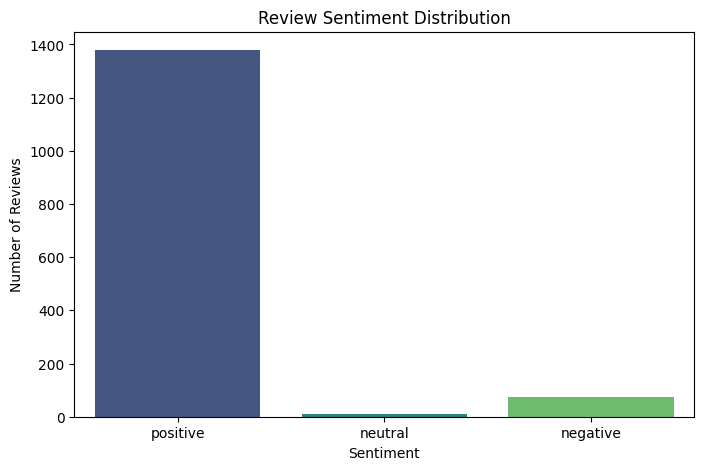

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df_clean['review_sentiment'] = df_clean['review_content'].fillna("").apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Label the sentiment
df_clean['sentiment_label'] = df_clean['review_sentiment'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral')
)

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Review Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [56]:
import plotly.express as px

# Create a new dataframe with rating and review length
df_length_rating = df_clean[['rating', 'review_content']].dropna().copy()

# Calculate review length
df_length_rating['review_length'] = df_length_rating['review_content'].apply(lambda x: len(str(x).split()))

# Plot interactive scatter plot
fig = px.scatter(df_length_rating,
                 x='review_length',
                 y='rating',
                 title='Review Length vs Rating',
                 labels={'review_length': 'Number of Words in Review', 'rating': 'Product Rating'},
                 opacity=0.6,
                 color='rating',
                 color_continuous_scale='Viridis')

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=600, width=900)
fig.show()


In [57]:
import plotly.express as px

# Select numerical features and clean NaNs
scatter_features = df_clean[['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage']].copy()
scatter_features = scatter_features.dropna()

# Create the scatter matrix
fig = px.scatter_matrix(scatter_features,
                        dimensions=scatter_features.columns,
                        title="Scatter Matrix of Key Product Features",
                        height=900, width=900)

fig.update_traces(diagonal_visible=False, marker=dict(size=5, opacity=0.7))
fig.update_layout(showlegend=False)
fig.show()


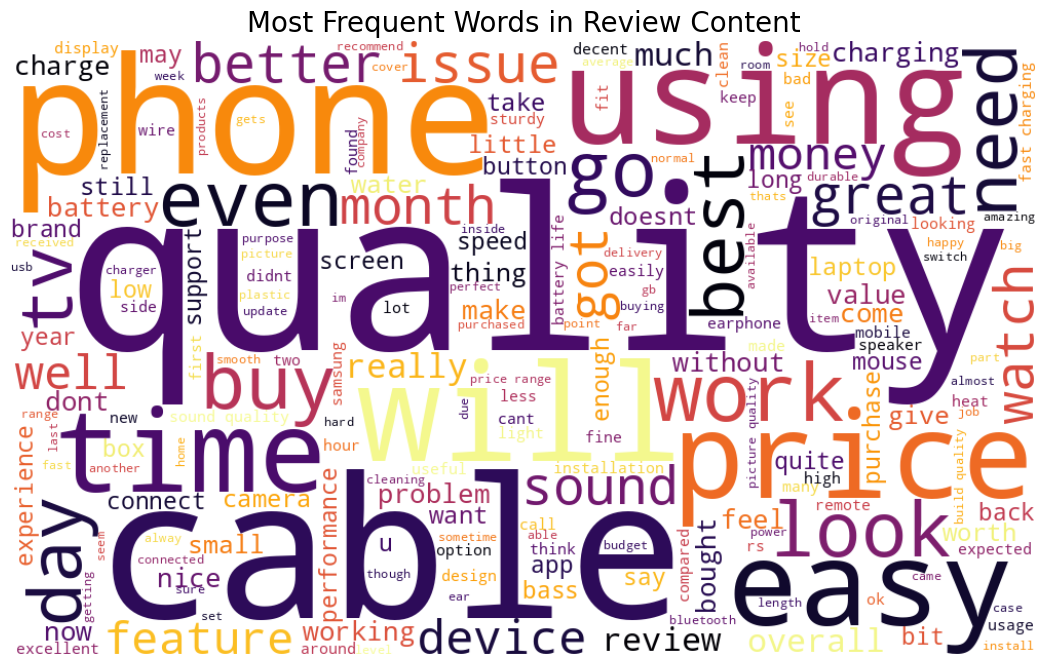

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Combine all review content into one string
text = " ".join(str(review).lower() for review in df_clean['review_content'].dropna())

# Clean the text
text = re.sub(r'\d+', '', text)  # Remove numbers
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['product', 'use', 'amazon', 'good', 'one', 'used', 'also'])

# Generate the wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      max_words=200,
                      width=1000,
                      height=600,
                      colormap='inferno').generate(text)

# Display the wordcloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Review Content", fontsize=20)
plt.show()


In [61]:
# Convert to string first, then clean symbols and convert back to float
df_clean['discounted_price'] = df_clean['discounted_price'].astype(str).str.replace("₹", "").str.replace(",", "").astype(float)
df_clean['actual_price'] = df_clean['actual_price'].astype(str).str.replace("₹", "").str.replace(",", "").astype(float)

df_clean['discount_percentage'] = df_clean['discount_percentage'].astype(str).str.replace("%", "").astype(float)
df_clean['rating_count'] = df_clean['rating_count'].astype(str).str.replace(",", "").astype(float)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🔧 Select relevant numerical features
features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
target = 'rating'

# ❗ Drop rows with missing values in selected columns
df_model = df_clean[features + [target]].dropna()

# 🎯 Features and Target
X = df_model[features]
y = df_model[target]

# 🔀 Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred = model.predict(X_test)

# 📊 Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.1116
R-squared (R²): 0.0332


/tmp/ipython-input-2412406082.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




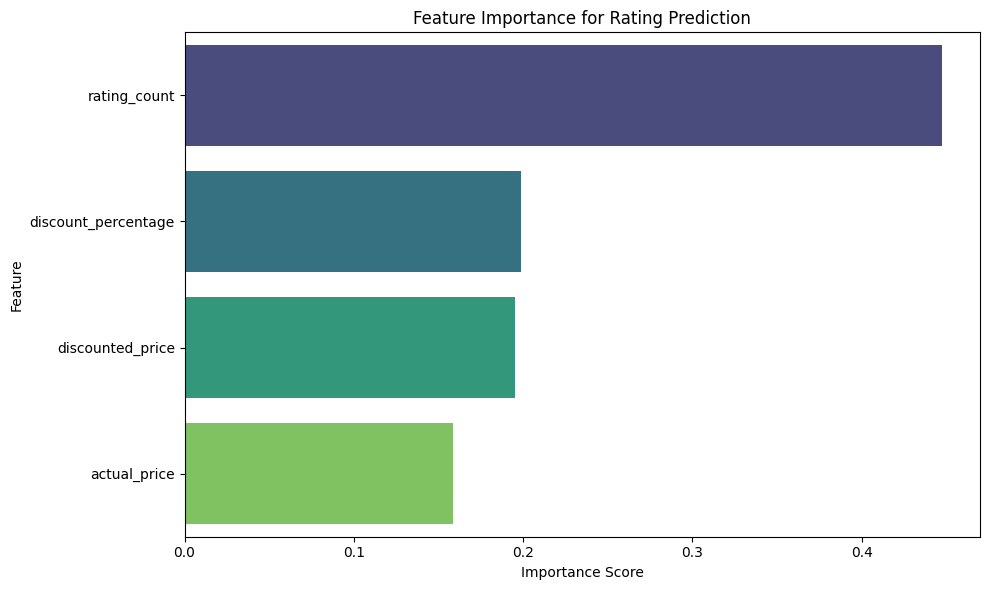

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Rating Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare feature and target
features = ['actual_price', 'discounted_price', 'rating', 'rating_count']
target = 'discount_percentage'

# Drop rows with missing values in the selected columns
df_model2 = df_clean[features + [target]].dropna()

# Define X and y
X2 = df_model2[features]
y2 = df_model2[target]

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X2_train, y2_train)

# Predict and evaluate
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print("🔢 Discount Prediction")
print(f"Mean Squared Error (MSE): {mse2:.4f}")
print(f"R-squared (R²): {r2_2:.4f}")


🔢 Discount Prediction
Mean Squared Error (MSE): 80.5263
R-squared (R²): 0.7578


In [66]:
from sklearn.linear_model import LinearRegression

# Review uzunluk sütununu hesapla
df_clean['review_length'] = df_clean['review_content'].astype(str).apply(lambda x: len(x.split()))
df_review = df_clean[['review_length', 'rating']].dropna()

# Özellik ve hedef tanımla
X3 = df_review[['review_length']]
y3 = df_review['rating']

# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Linear Regression modeli eğit
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

# Tahmin ve değerlendirme
y3_pred = model3.predict(X3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
r2_3 = r2_score(y3_test, y3_pred)

print("🧪 Rating Prediction from Review Length")
print(f"Mean Squared Error (MSE): {mse3:.4f}")
print(f"R-squared (R²): {r2_3:.4f}")


🧪 Rating Prediction from Review Length
Mean Squared Error (MSE): 0.0820
R-squared (R²): -0.0021


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ca1d8099620>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


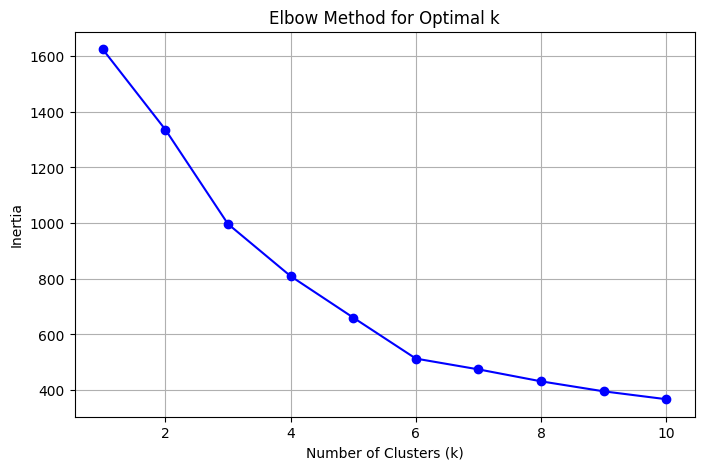

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
features = df_clean[['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate inertia for different k values
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


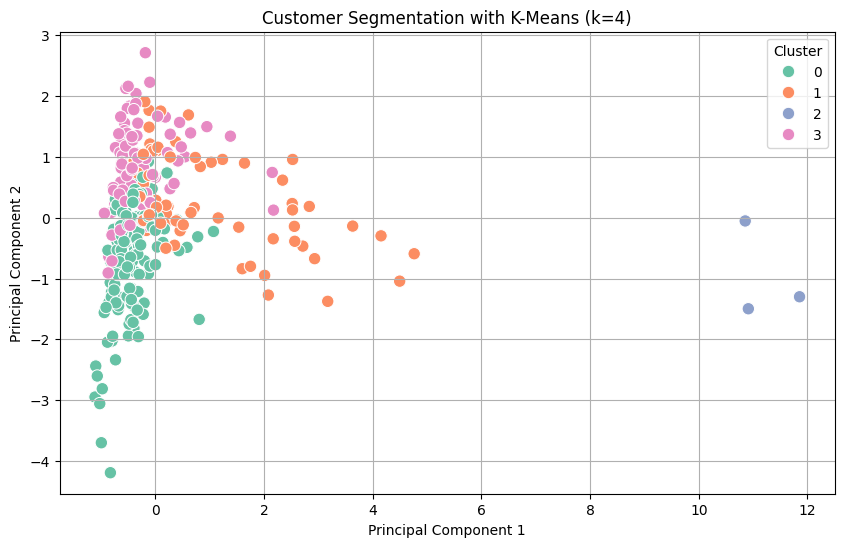

In [68]:
from sklearn.decomposition import PCA
import seaborn as sns

# K-means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=80)
plt.title('Customer Segmentation with K-Means (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fill missing product descriptions
df_clean['about_product'] = df_clean['about_product'].fillna("")

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_clean['about_product'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend products
def recommend_products(product_index, top_n=5):
    sim_scores = list(enumerate(cosine_sim[product_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude the product itself
    product_indices = [i[0] for i in sim_scores]
    return df_clean.iloc[product_indices][['product_name', 'discounted_price', 'rating']]

# Example: Recommend similar products to the first item
print("Recommendations for:", df_clean.iloc[0]['product_name'])
recommendations = recommend_products(0)
display(recommendations)


Recommendations for: Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)


,product_name,discounted_price,rating
367,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,4.2
612,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,4.2
220,Wayona Nylon Braided Usb Syncing And Charging ...,649.0,4.2
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,399.0,4.2
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,649.0,4.2


In [70]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Pivot table: user-product matrix
user_product_matrix = df_clean.pivot_table(index='user_id', columns='product_name', values='rating')

# Fill NaNs with 0 (optional for cosine similarity, sparse)
user_product_matrix_filled = user_product_matrix.fillna(0)

# Convert to sparse matrix
user_sparse_matrix = csr_matrix(user_product_matrix_filled.values)

# Compute user similarity matrix
user_similarity = cosine_similarity(user_sparse_matrix)

# Function to recommend products to a user based on similar users
def recommend_for_user(user_index, top_n=5):
    sim_scores = list(enumerate(user_similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    similar_users = [i[0] for i in sim_scores]

    # Get products rated highly by similar users but not yet by this user
    user_rated_products = set(user_product_matrix_filled.iloc[user_index].dropna().index)
    recommendations = {}

    for sim_user in similar_users:
        for product, rating in user_product_matrix_filled.iloc[sim_user].items():
            if product not in user_rated_products and rating > 3.5:
                recommendations[product] = recommendations.get(product, 0) + rating

    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return sorted_recommendations[:top_n]

# Example: Recommend for the 1st user in matrix
user_index = 0
print(f"User ID: {user_product_matrix_filled.index[user_index]}")
recommendations = recommend_for_user(user_index)
for product, score in recommendations:
    print(f"{product} (Estimated Score: {score:.2f})")


User ID: AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA


In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import pandas as pd

# Pivot table: product-user matrix
item_user_matrix = df_clean.pivot_table(index='product_name', columns='user_id', values='rating')

# Fill missing values with 0
item_user_matrix_filled = item_user_matrix.fillna(0)

# Convert to sparse matrix
item_sparse_matrix = csr_matrix(item_user_matrix_filled.values)

# Compute item similarity matrix
item_similarity = cosine_similarity(item_sparse_matrix)

# Item names to index mapping
item_indices = pd.Series(item_user_matrix_filled.index)

# Function to get similar items
def get_similar_items(item_name, top_n=5):
    if item_name not in item_indices.values:
        print(f"Item '{item_name}' not found in the dataset.")
        return []

    item_idx = item_indices[item_indices == item_name].index[0]
    sim_scores = list(enumerate(item_similarity[item_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    similar_items = [(item_indices[i], score) for i, score in sim_scores]
    return similar_items

# Example: Recommend similar products to a given item
target_item = item_user_matrix_filled.index[0]  # Replace with any product name you like
similar_items = get_similar_items(target_item)

print(f"\nProducts similar to: {target_item}\n")
for item, score in similar_items:
    print(f"{item} (Similarity Score: {score:.2f})")



Products similar to: !!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!

!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!! (Similarity Score: 0.00)
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor (Similarity Score: 0.00)
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox (Similarity Score: 0.00)
3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3" x 3" Size | For notes, reminders, study, school and organizing (Similarity Score: 0.00)
3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24m

In [74]:
import plotly.express as px

# Remove rows with missing required values
df_bubble = df_clean[['product_name', 'category', 'discount_percentage', 'rating', 'actual_price']].dropna()

# Ensure correct types
df_bubble['discount_percentage'] = df_bubble['discount_percentage'].astype(float)
df_bubble['rating'] = df_bubble['rating'].astype(float)
df_bubble['actual_price'] = df_bubble['actual_price'].astype(float)

# Create bubble chart
fig = px.scatter(df_bubble,
                 x='discount_percentage',
                 y='rating',
                 size='actual_price',
                 color='category',
                 hover_name='product_name',
                 size_max=60,
                 title='🎈 Discount vs Rating vs Price per Product')

fig.update_layout(xaxis_title='Discount Percentage (%)',
                  yaxis_title='Rating',
                  legend_title='Category',
                  template='plotly_dark')

fig.show()
